<a href="https://colab.research.google.com/github/mariapetrosyan/MarketingAnalytics/blob/main/BassModelHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK ON BASS MODEL


# Maria Petrosyan

### 1. The Innovation

DAXXIFY, developed by Revance Therapeutics, is an innovative injectable botulinum toxin that has been highlighted for its longevity in comparison to other products in the market. As mentioned in the Time's Best Inventions of 2023 list, it stands out for its ability to maintain its effect for a significantly longer period, which could be up to six months, providing a more durable option for those seeking aesthetic treatments for facial lines and wrinkles.

Source: https://time.com/collection/best-inventions-2023/6326375/revance-theraputics-daxxify/



### 2. The Look-alike Innovation From The Past

Allergan's Botox, introduced in 1989, revolutionized both cosmetic and therapeutic treatments with its botulinum toxin-based formula. As the first of its kind to gain FDA approval, Botox became synonymous with non-surgical aesthetic procedures aimed at reducing facial wrinkles. Its widespread acceptance was largely driven by the medical community's endorsement and the proven versatility of its applications, which transcended cosmetic uses to include various medical treatments. Botox's remarkable success set a high standard for subsequent products in the industry and established a robust market for facial injectables.

Enter DAXXIFY by Revance Therapeutics, a novel botulinum toxin product that draws a parallel to Botox due to its similar applications but extends the legacy with an innovative twist — a significantly longer-lasting effect. Clinically proven to maintain its efficacy for up to six months and sometimes even up to nine, DAXXIFY builds upon the well-established base Botox created and meets the unmet need for longevity in treatment results. This extended duration not only enhances patient convenience but also marks an evolutionary step in the injectable cosmetic landscape, making DAXXIFY a look-alike innovation with the potential to reshape market expectations.

Sources: https://www.fiercepharma.com/pharma/long-awaited-fda-nod-revance-set-take-abbvies-botox-its-longer-lasting-daxxify




### 3. Time Series Data


ChatGPT
The time series data on the botulinum toxin market size in China from 2016 to 2019 serves as a valuable proxy for understanding the market dynamics of Allergan's Botox within a specific and rapidly growing segment of the global aesthetic industry. This period captures a crucial phase during which the market was maturing and expanding, reflecting both the increasing consumer demand for aesthetic treatments and the broader acceptance of botulinum toxin as a safe and standard cosmetic procedure. The data provides insight into the adoption rate and market penetration of botulinum toxin products, offering a quantitative foundation for modeling market behavior and forecasting future trends.

Choosing this specific time series is particularly relevant for approximating Allergan's Botox performance as it represents a significant market with unique characteristics and potential. China's vast population and growing middle class have made it a key market for cosmetic procedures. The increasing market size over these years suggests a rising consumer base and the potential for high adoption rates, making it an exemplary model for analyzing similar products. This data can be instrumental in predicting the adoption curve of newer entrants like DAXXIFY, considering the similarities in consumer demographics, regulatory environments, and market growth potential.

Source: https://www.statista.com/statistics/1255841/china-market-size-of-botulinum-toxin/

### 4. Bass Model Estimation

In [30]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [31]:
data = '/content/BotulinumToxinMarketSize.xlsx'

def read_specific_data(data):
    df = pd.read_excel(data, sheet_name='Data')
    # Selecting rows 5-10 (index 4-9 in Python) and columns B and C (index 1-2 in Python)
    specific_data = df.iloc[4:10, 1:3]
    specific_data.columns = ['years', 'market_size']
    return specific_data

df = read_specific_data(data)
df


,years,market_size
4,2015,1.75
5,2016,2.24
6,2017,2.96
7,2018,3.92
8,2019,4.86


In [32]:
def bass_model(t, p, q, m):
    return m * (1 - np.exp(-(p+q)*t)) / (1 + (q/p) * np.exp(-(p+q)*t))


The Bass model has three parameters:

p: The innovation coefficient, which represents the probability that a potential customer will adopt the new product because of innovation.

q: The imitation coefficient, which represents the probability that a potential customer will adopt the new product because of imitation.

m: The market potential, which represents the maximum number of potential customers for the new product.

In [48]:
df['years'] = pd.to_numeric(df['years'], errors='coerce')

df['years'] = df['years'] - df['years'].min()


In [49]:
xdata = df['years'].values
ydata = df['market_size'].values


In [50]:
initial_guess = [0.01, 0.01, max(ydata) * 2]
params, cov = curve_fit(bass_model, xdata, ydata, p0=initial_guess)
p, q, M = params

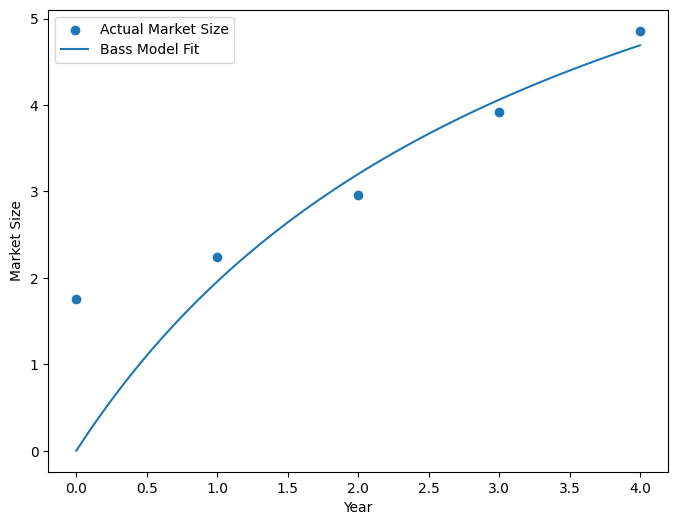

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(df['years'] + df['years'].min(), ydata, label='Actual Market Size')
t = np.linspace(0, max(xdata), 100)
plt.plot(t + df['years'].min(), bass_model(t, p, q, M), label='Bass Model Fit')
plt.xlabel('Year')
plt.ylabel('Market Size')
plt.legend()
plt.show()

In [12]:
print(f"Estimated parameters:\np: {p}\nq: {q}\nM: {M}")

Estimated parameters:
p: 0.28701635231671346
q: -0.2871169123898348
M: 8.778216281530986


We got a negative q which may suggest that the model fitting process might not have converged properly or that the initial parameter estimates were not close enough to the true values, leading to an unrealistic fit. So we can play with p and q based on our knowledge on the product. For example, if it's a highly innovative product,
p might be higher. If the product spreads through word-of-mouth, q might be higher. We will try the two cases.

In [13]:
def bass_model(t, p, q, M):
    return M * ((1 - np.exp(-(p + q) * (t - t[0]))) / (1 + (q / p) * np.exp(-(p + q) * (t - t[0]))))


In [14]:
df['years'] = df['years'] - df['years'].min()
xdata = df['years'].values
ydata = df['market_size'].values


In [15]:
initial_guess = [0.03, 0.3, max(ydata) * 2]


In [16]:
params, covariance = curve_fit(bass_model, xdata, ydata, p0=initial_guess, bounds=(0, [1, 1, np.inf]))
p_est, q_est, M_est = params

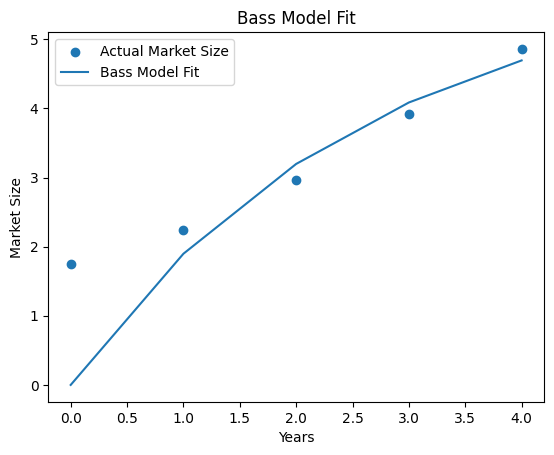

In [17]:
plt.scatter(xdata, ydata, label='Actual Market Size')
t_fit = np.linspace(min(xdata), max(xdata), len(xdata)) - min(xdata)
plt.plot(xdata, bass_model(t_fit, p_est, q_est, M_est), label='Bass Model Fit')
plt.title('Bass Model Fit')
plt.xlabel('Years')
plt.ylabel('Market Size')
plt.legend()
plt.show()

In [18]:
print(f'Estimated parameters:\np: {p_est}\nq: {q_est}\nM: {M_est}')

Estimated parameters:
p: 0.3791610292890325
q: 1.3066053014342487e-15
M: 6.013254539297898


In [19]:
initial_guess = [0.3, 0.03, max(ydata) * 2]

In [20]:
params, covariance = curve_fit(bass_model, xdata, ydata, p0=initial_guess, bounds=(0, [1, 1, np.inf]))
p_est, q_est, M_est = params

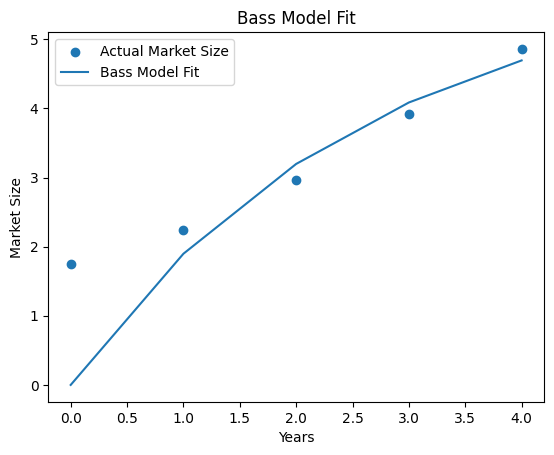

In [21]:
plt.scatter(xdata, ydata, label='Actual Market Size')
t_fit = np.linspace(min(xdata), max(xdata), len(xdata)) - min(xdata)
plt.plot(xdata, bass_model(t_fit, p_est, q_est, M_est), label='Bass Model Fit')
plt.title('Bass Model Fit')
plt.xlabel('Years')
plt.ylabel('Market Size')
plt.legend()
plt.show()

In [22]:
print(f'Estimated parameters:\np: {p_est}\nq: {q_est}\nM: {M_est}')

Estimated parameters:
p: 0.3791619270399609
q: 4.339708522959837e-16
M: 6.013246915852821


Given the history of Botox, its spread can be attributed to both its innovative nature and the influence of medical professionals who noted its benefits. This dual channel of innovation and professional endorsement helped Botox become a household name and a staple in cosmetic treatments. I will prefer to proceed with the last model to make the predicitions of the diffusion for Daxxify.


### 5. Prediction of the diffusion of Daxxify

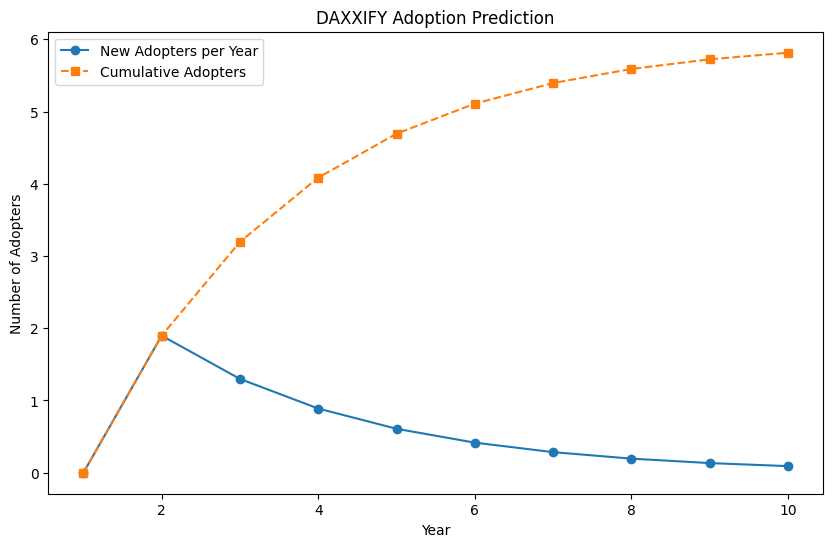

In [25]:
p = 0.3791619270399609
q = 4.339708522959837e-16  # very close to 0
M = 6.013246915852821

def bass_model(t, p, q, M):
    return M * ((1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t)))

years = np.arange(1, 11)  # 1 to 10 years
t = years - min(years)

cumulative_adopters = bass_model(t, p, q, M)
new_adopters = np.diff(cumulative_adopters, prepend=0)

plt.figure(figsize=(10, 6))
plt.plot(years, new_adopters, 'o-', label='New Adopters per Year')
plt.plot(years, cumulative_adopters, 's--', label='Cumulative Adopters')
plt.title('DAXXIFY Adoption Prediction')
plt.xlabel('Year')
plt.ylabel('Number of Adopters')
plt.legend()
plt.show()


### 6. Estimating number of adopters using Fermi estimation

To estimate the potential market size for DAXXIFY in China using a Fermi estimate and the adoption rate with the Bass model, we will make some assumptions.

 In the United States alone, over 3.6 million people get Botox yearly from 331.9 million total population of US. Given the popularity of cosmetic procedures in China, which is one of the largest markets for such treatments, it's reasonable to assume a significant interest in Botox there as well.

If we consider that China has a population of approximately 1.4 billion and if a similar proportion of the population uses Botox as in the U.S., we could infer that the market is approximately 1 %.


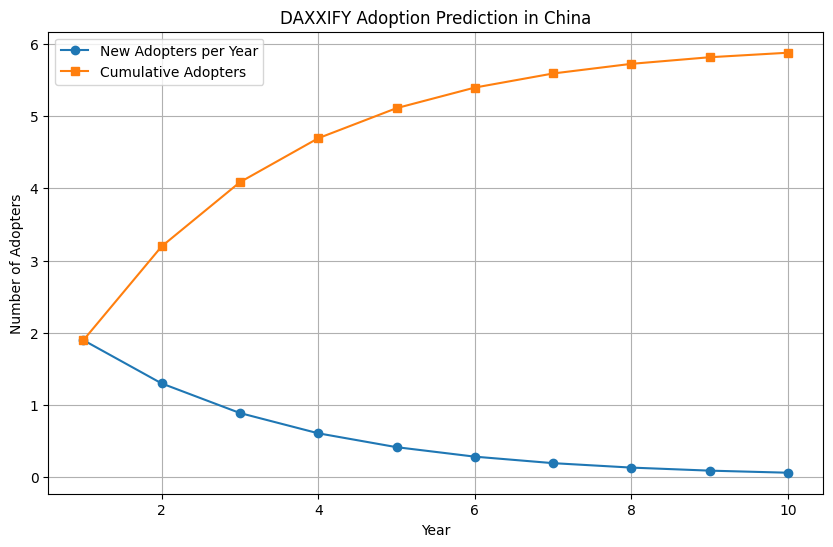

In [55]:
total_population = 1.4e9  # Total population of China
adoption_percentage = 0.01  # Assumed percentage of population that might use cosmetic treatments
potential_market_size = total_population * adoption_percentage

p = 0.3791619270399609
q = 4.339708522959837e-16  # very close to 0
m = 6.013246915852821

def bass_model(t, p, q, m):
    part1 = np.exp(-(p + q) * t)
    part2 = 1 + q / p * part1
    return m * (1 - part1 / part2)

years = np.arange(1, 11)

# cumulative adopters for each year
cumulative_adopters = bass_model(years, p, q, m)

# new adopters per year by taking the first difference of the cumulative adopters
new_adopters = np.diff(cumulative_adopters, prepend=0)

plt.figure(figsize=(10, 6))
plt.plot(years, new_adopters, 'o-', label='New Adopters per Year')
plt.plot(years, cumulative_adopters, 's-', label='Cumulative Adopters')
plt.title('DAXXIFY Adoption Prediction in China')
plt.xlabel('Year')
plt.ylabel('Number of Adopters')
plt.legend()
plt.grid(True)
plt.show()